In [1]:
# Import necessary libraries
import re

# Define the path to the CP2K output file
output_file = 'test.out'

# Function to extract the total energy from the CP2K output file
def extract_total_energy(filename):
    total_energy = None
    with open(filename, 'r') as file:
        for line in file:
            if 'Total FORCE_EVAL ( QS ) energy' in line:
                match = re.search(r'-?\d+\.\d+', line)
                if match:
                    total_energy = float(match.group(0))
    return total_energy

# Extract the total energy
total_energy = extract_total_energy(output_file)
print(f'Total Energy: {total_energy} a.u.')


Total Energy: -17.2196727867509 a.u.


In [2]:
# Function to extract SCF convergence information
def extract_scf_convergence(filename):
    convergence_data = []
    with open(filename, 'r') as file:
        for line in file:
            if 'SCF run converged' in line:
                convergence_data.append(line.strip())
    return convergence_data

# Extract SCF convergence information
scf_convergence = extract_scf_convergence(output_file)
for item in scf_convergence:
    print(item)


*** SCF run converged in    15 steps ***


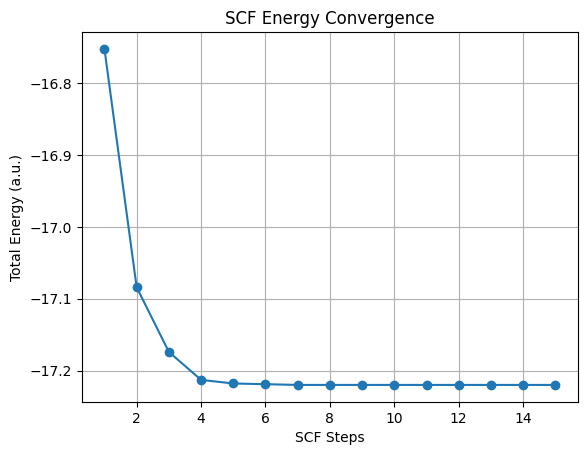

In [5]:
import matplotlib.pyplot as plt

# Example data
scf_steps = list(range(1, 16))
energies = [-16.752, -17.084, -17.174, -17.213, -17.218, -17.219, -17.220, -17.220, -17.220, -17.220, -17.220, -17.220, -17.220, -17.220, -17.220]

# Plotting the SCF energy convergence
plt.plot(scf_steps, energies, marker='o')
plt.xlabel('SCF Steps')
plt.ylabel('Total Energy (a.u.)')
plt.title('SCF Energy Convergence')
plt.grid(True)
plt.show()
